# M1

In [1]:
import sys
sys.path.append("/raid/infolab/bhavyakohli/mmdet/Co-DETR/")
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

from mmdet.apis import *

# Setup a checkpoint file to load
checkpoint = '../experiments/quadrant_codetr/latest.pth'
configpath = '../experiments/quadrant_codetr/co_dino_5scale_r50_1x_coco_quadrant.py'

model = init_detector(configpath, checkpoint)

2024-04-14 22:02:52,733 - mmcv - INFO - initialize RPNHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01}
2024-04-14 22:02:52,745 - mmcv - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:02:52,746 - mmcv - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:02:52,747 - mmcv - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:02:52,748 - mmcv - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:02:52,748 - mmcv - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:02:52,749 - mmcv - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:02:52,833 - mmcv - INFO - initialize Shared2FCBBoxHead with init_cfg [{'type': 'Normal', 'std': 0.01, 'override': {'name': 'fc_cls'

In [2]:
import sys
sys.path.append("/raid/infolab/bhavyakohli/mmdet/Co-DETR/")
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

from mmdet.apis import *

# Setup a checkpoint file to load
checkpoint = '../experiments/quadrant_codetr/latest.pth'
configpath = '../experiments/quadrant_codetr/co_dino_5scale_r50_1x_coco_quadrant.py'

model = init_detector(configpath, checkpoint)

2024-04-14 22:03:07,132 - mmcv - INFO - initialize RPNHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01}
2024-04-14 22:03:07,146 - mmcv - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:03:07,147 - mmcv - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:03:07,149 - mmcv - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:03:07,149 - mmcv - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:03:07,150 - mmcv - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:03:07,151 - mmcv - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-14 22:03:07,326 - mmcv - INFO - initialize Shared2FCBBoxHead with init_cfg [{'type': 'Normal', 'std': 0.01, 'override': {'name': 'fc_cls'

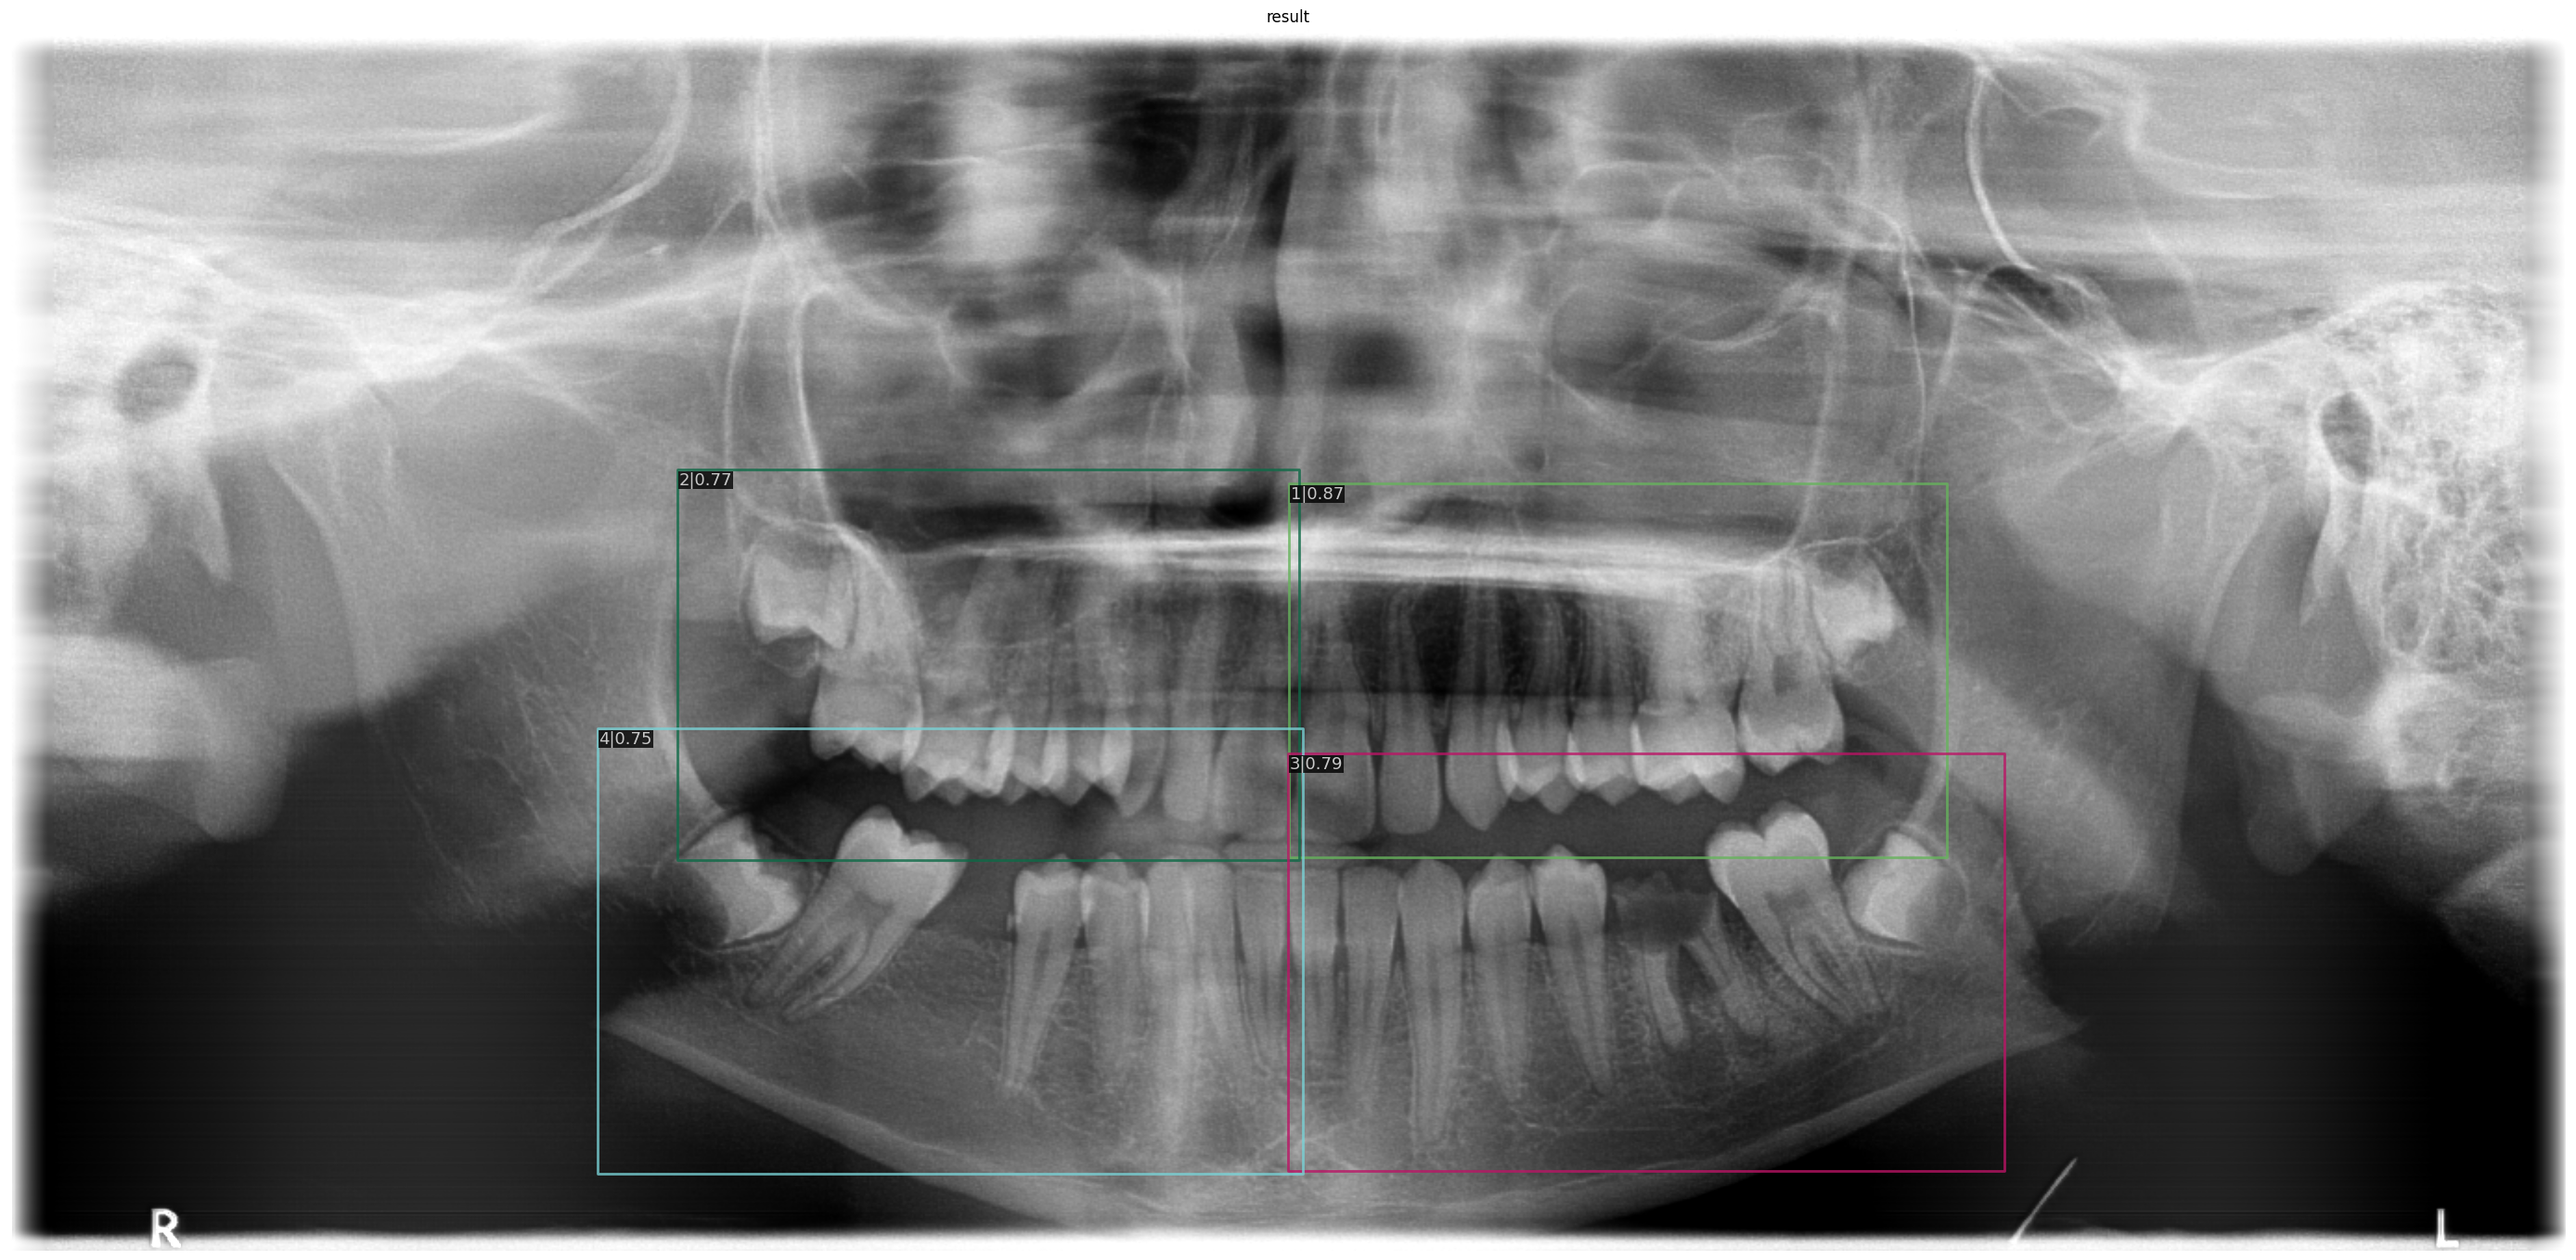

In [18]:
imagepath = "/raid/infolab/bhavyakohli/mmdet/Co-DETR/data/dental/test/train_18.png"
results = inference_detector(model, [imagepath] * 2)

# results contains 4 arrays of shape (num_proposals x 5)
# the first 4 elements are the bbox params, last element is the score
# the first entry is the proposal with the highest score

show_result_pyplot(model, imagepath, results[0])

In [9]:
import cv2

cv2.imread(imagepath).shape

(1504, 2868, 3)

In [25]:
results[1][3].shape

(32, 5)

In [12]:
[i.shape for i in results[0]]

[(17, 5), (20, 5), (48, 5), (33, 5)]

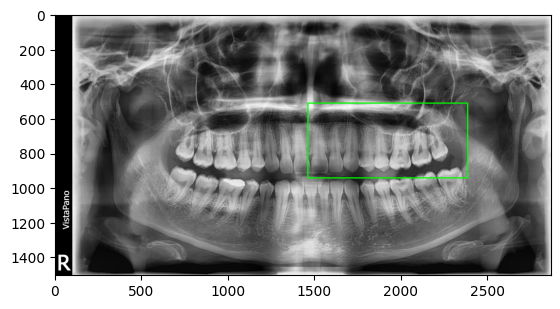

In [22]:
image = cv2.imread(imagepath)
for dic in [i[0][:-1] for i in results[0]]:
    x_min, y_min, width, height = dic
    width = width - x_min
    height = height - y_min

    x_max = x_min + width
    y_max = y_min + height

    # if dic["category_id_1"] == 0:
    #     color = (255, 0, 0)        #red
    # elif dic["category_id_1"] == 1:
    #     color = (0, 255, 0)     #green
    # elif dic["category_id_1"] == 2:
    #     color = (0, 0, 255)     #blue
    # elif dic["category_id_1"] == 3:
    #     color = (0, 0,0)            #black
    thickness = 5
    cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0,255,0), thickness)
    break

plt.imshow(image)

In [15]:
[i[0][:-1] for i in results[0]]

[array([1378.2034 ,  489.86716, 2087.8333 ,  892.90607], dtype=float32),
 array([ 719.04486,  474.2181 , 1390.0717 ,  895.69336], dtype=float32),
 array([1377.554 ,  780.4124, 2149.2295, 1230.4845], dtype=float32),
 array([ 633.6546,  752.9677, 1393.0656, 1233.757 ], dtype=float32)]

In [17]:
results[0][0][0]

array([1.3782034e+03, 4.8986716e+02, 2.0878333e+03, 8.9290607e+02,
       8.6841846e-01], dtype=float32)

# M2

In [2]:
import sys
sys.path.append("/raid/infolab/bhavyakohli/mmdet/Co-DETR/")
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

from mmdet.apis import *

# Setup a checkpoint file to load
checkpoint = '../experiments/enumeration_codetr_ver2/latest.pth'
configpath = '../experiments/enumeration_codetr_ver2/co_dino_5scale_r50_1x_coco_enumeration.py'

model = init_detector(configpath, checkpoint)

2024-04-15 01:33:56,133 - mmcv - INFO - initialize RPNHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01}
2024-04-15 01:33:56,201 - mmcv - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-15 01:33:56,202 - mmcv - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-15 01:33:56,202 - mmcv - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-15 01:33:56,203 - mmcv - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-15 01:33:56,204 - mmcv - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-15 01:33:56,204 - mmcv - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-04-15 01:33:56,590 - mmcv - INFO - initialize Shared2FCBBoxHead with init_cfg [{'type': 'Normal', 'std': 0.01, 'override': {'name': 'fc_cls'

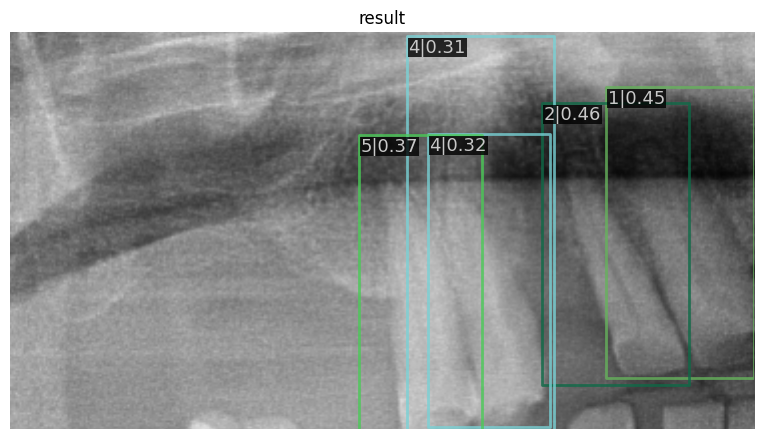

[0.45, 0.46, 0.18, 0.32, 0.37, 0.08, 0.07, 0.19]

In [3]:
imagepath = "/raid/infolab/bhavyakohli/mmdet/Co-DETR/data/enumeration/train/train_6_1.png"
results = inference_detector(model, [imagepath] * 1)

# results contains upto 8 arrays of shape (num_proposals x 5)
# the first upto 8 elements are the bbox params, last element is the score
# the first entry is the proposal with the highest score

show_result_pyplot(model, imagepath, results[0])
[round(i[0][-1], 2) for i in results[0]]

In [46]:
import cv2, matplotlib.pyplot as plt
import numpy as np

In [44]:
i1, i2 = 6,7
results[0][i1][0].astype(int), results[0][i2][0].astype(int)

(array([ 36,  53, 224, 252,   0]), array([ 36,  53, 224, 252,   0]))

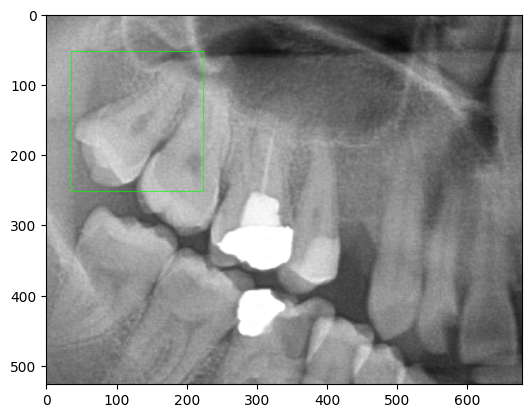

In [55]:
image = cv2.imread(imagepath)
# for dic in results[0]:
dic = results[0][7]
x_min, y_min, x_max, y_max = dic[0][:-1]

thickness = 1
cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), thickness)

plt.imshow(image)

In [51]:
found = {}
for n, boxes in enumerate([i[0][:-1] for i in results[0]]):
    found[n] = boxes
    # if boxes in found:
        # found.append(boxes)

In [52]:
found

{0: array([584.60535, 181.46101, 677.17236, 509.9118 ], dtype=float32),
 1: array([524.6063 , 177.54582, 606.9541 , 493.9189 ], dtype=float32),
 2: array([454.893  , 141.46487, 551.97437, 472.80222], dtype=float32),
 3: array([325.55737, 121.06037, 426.2881 , 404.68954], dtype=float32),
 4: array([325.55737, 121.06037, 426.2881 , 404.68954], dtype=float32),
 5: array([126.2841  ,  69.257545, 278.20447 , 320.79483 ], dtype=float32),
 6: array([ 36.82518 ,  53.455753, 224.16138 , 252.18124 ], dtype=float32),
 7: array([ 36.82518 ,  53.455753, 224.16138 , 252.18124 ], dtype=float32)}

In [12]:
dir(model)

['CLASSES',
 'T_destination',
 '__abstractmethods__',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_dump_init_info',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_is_init',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_parse_losses',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 